In [30]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer

exp_dirs = ["./exp_single_2", "./exp_single_4", "./exp_single_8", "./exp_single_16", "./exp_single_32"] 
# exp_dirs = ["./exp_4", "./exp_8", "./exp_16", "./exp_32", "./exp_64"] 
exp_dirs += ["./exp_udata_2", "./exp_udata_4", "./exp_udata_8", "./exp_udata_16", "./exp_udata_32"]

df = None

for exp_dir in exp_dirs:
    rv = RunViewer(exp_path=exp_dir)
    df_org = rv.fetch_results()
    if df is None:
        df = df_org
    else:
        df = pl.concat([df, df_org], how="vertical")
        
df = df.select(pl.exclude("run_id")).with_row_index("run_id")
display(df)



run_id,max_lr,epochs,batch_size,ensemble_type,train_trans,val_trans,num_data,iters/epoch,dataset,model_arc,fils,ensembles,params,loss_func,optimizer,scheduler,lr,epoch,train_loss,train_acc,val_loss,val_acc
u32,f64,i64,i64,str,str,str,i64,i64,str,str,i64,i64,i64,str,str,str,f64,i64,f64,f64,f64,f64
0,0.005,500,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",10000,80,"""cifar10_train""","""models.gitresnet_ee""",1,1,2991,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 50…",4.9348e-8,500,0.682604,0.507,0.662551,0.5228
1,0.005,500,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",10000,80,"""cifar10_train""","""models.gitresnet_ee""",2,1,11420,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 50…",4.9348e-8,500,0.457454,0.6758,0.514701,0.6488
2,0.005,666,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",7500,60,"""cifar10_train""","""models.gitresnet_ee""",1,1,2991,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 66…",2.7814e-8,666,0.673668,0.514933,0.654212,0.5259
3,0.005,666,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",7500,60,"""cifar10_train""","""models.gitresnet_ee""",2,1,11420,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 66…",2.7814e-8,666,0.440906,0.679467,0.557748,0.6176
4,0.005,1000,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",5000,40,"""cifar10_train""","""models.gitresnet_ee""",1,1,2991,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-8,1000,0.734811,0.4738,0.734667,0.4789
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
275,0.005,1000,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",5000,40,"""cifar10_train""","""models.gitresnet_ee""",32,1,2797610,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-8,1000,0.000269,0.9998,2.326996,0.7805
276,0.005,1250,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",4000,32,"""cifar10_train""","""models.gitresnet_ee""",32,1,2797610,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 12…",7.8957e-9,1250,0.000022,1.0,2.963573,0.7439
277,0.005,1666,125,"""easy""","""[RandomCrop(size=(32, 32), pad…","""[ToTensor(), Normalize(mean=[0…",3000,24,"""cifar10_train""","""models.gitresnet_ee""",32,1,2797610,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 16…",4.4449e-9,1666,0.000048,1.0,3.860212,0.6992


num_data,1,32,32-1
i64,f64,f64,f64
1000,0.38402,0.5258,0.14178
2000,0.4507,0.6424,0.1917
3000,0.48774,0.6926,0.20486
4000,0.50364,0.7476,0.24396
5000,0.50694,0.7683,0.26136
7500,0.51748,0.81945,0.30197
10000,0.52394,0.83545,0.31151


num_data,1,1024,1024-1
i64,f64,f64,f64
1000,0.38402,0.5581,0.17408
2000,0.4507,0.6274,0.1767
3000,0.48774,0.6796,0.19186
4000,0.50364,0.6982,0.19456
5000,0.50694,0.7172,0.21026
7500,0.51748,0.7531,0.23562
10000,0.52394,0.768,0.24406


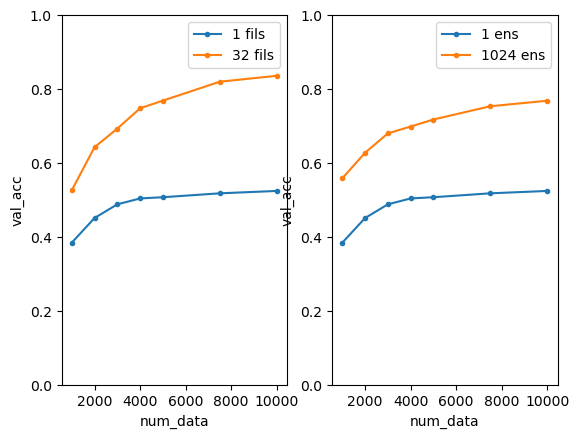

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False)

df_ext = df.filter((pl.col("ensembles") == 1) & (pl.col("fils").is_in([1, 32])))
# df_ext = df.filter((pl.col("ensembles") == 1) & (pl.col("fils").is_in([1, 4, 32])))
df_piv = df_ext.pivot(values="val_acc", index="num_data", columns="fils", aggregate_function="mean").sort(by="num_data")

ser_x = df_piv[df_piv.columns[0]]
df_y = df_piv[df_piv.columns[1:]]

df_diff = df_piv.with_columns((pl.col("32") - pl.col("1")).alias("32-1"))
display(df_diff)

for ser_fil in df_y.iter_columns():
    ax[0][0].set_xlabel("num_data")
    ax[0][0].set_ylabel("val_acc")
    ax[0][0].plot(ser_x, ser_fil, label=ser_fil.name + " fils", marker=".")
    ax[0][0].legend()
    ax[0][0].set_ylim([0, 1])
    

df_ext = df.filter((pl.col("fils") == 1) & (pl.col("ensembles").is_in([1, 1024])))
# df_ext = df.filter((pl.col("fils") == 1) & (pl.col("ensembles").is_in([1, 16, 1024])))
df_piv = df_ext.pivot(values="val_acc", index="num_data", columns="ensembles", aggregate_function="mean").sort(by="num_data")

ser_x = df_piv[df_piv.columns[0]]
df_y = df_piv[df_piv.columns[1:]]

df_diff = df_piv.with_columns((pl.col("1024") - pl.col("1")).alias("1024-1"))
display(df_diff)

for ser_fil in df_y.iter_columns():
    ax[0][1].set_xlabel("num_data")
    ax[0][1].set_ylabel("val_acc")
    ax[0][1].plot(ser_x, ser_fil, label=ser_fil.name + " ens", marker=".")
    ax[0][1].legend()
    ax[0][1].set_ylim([0, 1])

    
fig.show()

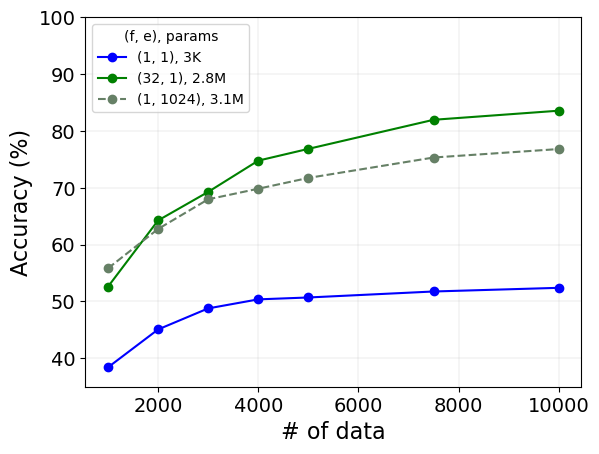

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df_ext = df
# df_ext = df.filter((pl.col("ensembles") == 1) & (pl.col("fils").is_in([1, 4, 32])))
df_agg = df_ext.with_columns(pl.lit(1).alias("trials")).group_by("num_data", "fils", "ensembles", maintain_order=True).agg(pl.col("params").mean(), pl.col("val_acc").mean(), pl.col("trials").sum())


fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)
ax[0][0].set_xlabel("# of data", fontsize=16)
ax[0][0].set_ylabel("Accuracy (%)", fontsize=16)
ax[0][0].set_ylim([35, 100])
# ax[0][0].set_ylim([0.35, 1])

ax[0][0].tick_params(axis='x', labelsize=14)
ax[0][0].tick_params(axis='y', labelsize=14)
# ax[0][0].set_ylim([min(y)-0.5, max(y)+1])
ax[0][0].grid(color=(0.35, 0.35, 0.35), linestyle='-', linewidth=0.08)


t = 0
m = 1
alpha = 1
colorsa = [(t, t, m, alpha), (t, m/2, t, alpha)]
# colorsa = [(t, t, m, alpha), (m, t, t, alpha), (t, m/2, t, alpha)]

t = 0.4
m = 1
alpha = 1
colorsb = [(t, m/2, t, alpha)]
# colorsb = [(t, t, m, alpha), (t, m/2, t, alpha)]
# colorsb = [(t, t, m, alpha), (m, t, t, alpha), (t, m/2, t, alpha)]

# paramsa = ["3K", "45K", "2.8M"]
# paramsb = ["3K", "48K", "3.1M"]
paramsa = ["3K", "2.8M"]
paramsb = ["3.1M"]
# paramsb = ["3K", "3.1M"]

df_1ens = df_agg.filter((pl.col("ensembles") == 1) & (pl.col("fils").is_in([1, 32])))
# df_1ens = df_agg.filter((pl.col("ensembles") == 1) & (pl.col("fils").is_in([1, 4, 32])))

for i, fil in enumerate(df_1ens["fils"].unique().sort()):
    df_fil = df_1ens.filter(pl.col("fils") == fil).sort(by="num_data")
    x = df_fil["num_data"]
    y = df_fil["val_acc"] * 100
    # p = int(df_fil["params"][0])
    p = paramsa[i]
    ax[0][0].plot(x, y, color=colorsa[i], marker="o", label=f"({fil}, 1), {p}")


df_1fil = df_agg.filter((pl.col("fils") == 1) & (pl.col("ensembles").is_in([1024])))
# df_1fil = df_agg.filter((pl.col("fils") == 1) & (pl.col("ensembles").is_in([1, 16, 1024])))

for i, ens in enumerate(df_1fil["ensembles"].unique().sort()):
    df_ens = df_1fil.filter(pl.col("ensembles") == ens).sort(by="num_data")
    x = df_ens["num_data"]
    y = df_ens["val_acc"] * 100
    p = paramsb[i]
    # p = int(df_ens["params"][0])
    ax[0][0].plot(x, y, color=colorsb[i], linestyle="--", marker="o", label=f"(1, {ens}), {p}")


ax[0][0].legend(title=r"(f, e), params")

with pl.Config() as cfg: 
    cfg.set_tbl_cols(df.width)
    cfg.set_tbl_rows(df.height)
    # display(df_agg)
    # display(df_1ens["fils"].unique().sort())

SchemaFieldNotFoundError: 

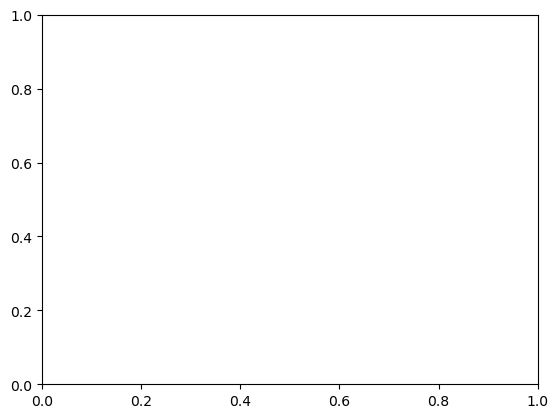

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)

df_ext = df.filter((pl.col("ensembles") == 1) & (pl.col("num_data").is_in([1000, 5000, 10000])))
# df_piv = df_ext.pivot(values="val_acc", index="fils", columns="num_data", aggregate_function="mean").sort(by="fils")
df_piv = df_ext.pivot(values="val_acc", index="fils", columns=["num_data", ""], aggregate_function="mean").sort(by="fils")

ser_x = df_piv[df_piv.columns[0]]
df_y = df_piv[df_piv.columns[1:]]

display(df_piv)

for ser_fil in df_y.iter_columns():
    ax[0][0].plot(ser_x, ser_fil, label=ser_fil.name + " data", marker=".")
ax[0][0].set_xlabel("fils")
ax[0][0].set_ylabel("val_acc")
ax[0][0].legend()
ax[0][0].set_ylim([0, 1])
    

df_ext = df.filter((pl.col("fils") == 1) & (pl.col("num_data").is_in([1000, 5000, 10000])))
df_piv = df_ext.pivot(values="val_acc", index="ensembles", columns="num_data", aggregate_function="mean").sort(by="ensembles")

ser_x = df_piv[df_piv.columns[0]]
df_y = df_piv[df_piv.columns[1:]]

display(df_piv)

for ser_fil in df_y.iter_columns():
    ax[0][0].plot(ser_x, ser_fil, label=ser_fil.name + " data", marker=".")
ax[0][0].set_xlabel("ensembles")
ax[0][0].set_ylabel("val_acc")
ax[0][0].legend()
ax[0][0].set_ylim([0, 1])
ax[0][0].set_xscale("log")

    
fig.show()

In [ ]:
def p(df):
    fig, ax = plt.subplots()
    x = df["num_data"]
    y = df["val_acc"]
    ax.set_xlabel("num_data")
    ax.set_ylabel("val_acc")
    ax.plot(x, y, label=)
    ax.legend()
    ax.set_ylim([0, 1])


df_ext = df.filter((pl.col("fils") == 1) & (pl.col("ensembles") == 1))
p(df_ext)
df_ext = df.filter((pl.col("fils") == 32) & (pl.col("ensembles") == 1))
p(df_ext)
df_ext = df.filter((pl.col("fils") == 1) & (pl.col("ensembles") == 1024))
p(df_ext)

SyntaxError: invalid syntax (2628603296.py, line 7)